<a href="https://colab.research.google.com/github/Marzban-io/refinery-instrument-thresholds/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



--- Analyse van Metingen voor Temperatuur MS4005 (RDTIC4312D.PV), °C van: ./reactor D.csv ---
--- Apparaattype: temperatuur, Ontwerp: 175.0, Bedrijf (proces): 55.0 ---
--- Gebruik van SOFT_LIMIT_IKA_MULTIPLIER: 4.5 ---

1. Data Opschonen en Voorbereiden:

3. Voorgestelde Operationele Limieten:
  Zachte Limieten: (44.83, 70.32)
  Harde Bovenlimiet: 170.00 (Ontwerp - 5°C)
Aantal zachte anomalieën gedetecteerd: 4

--- Genereren van Visuele Overzichtstabel als Afbeelding voor Temperatuur MS4005 (RDTIC4312D.PV), °C ---
  Visuele overzichtstabel opgeslagen naar: Temperatuur_MS4005_RDTIC4312D.PV_C_statistisch_overzicht_tabel.png

--- Genereren van Gerichte Fluctuatiegrafiek ---
  Gerichte fluctuatiegrafiek opgeslagen naar: Temperatuur_MS4005_RDTIC4312D.PV_C_gerichte_fluctuatie_grafiek.png


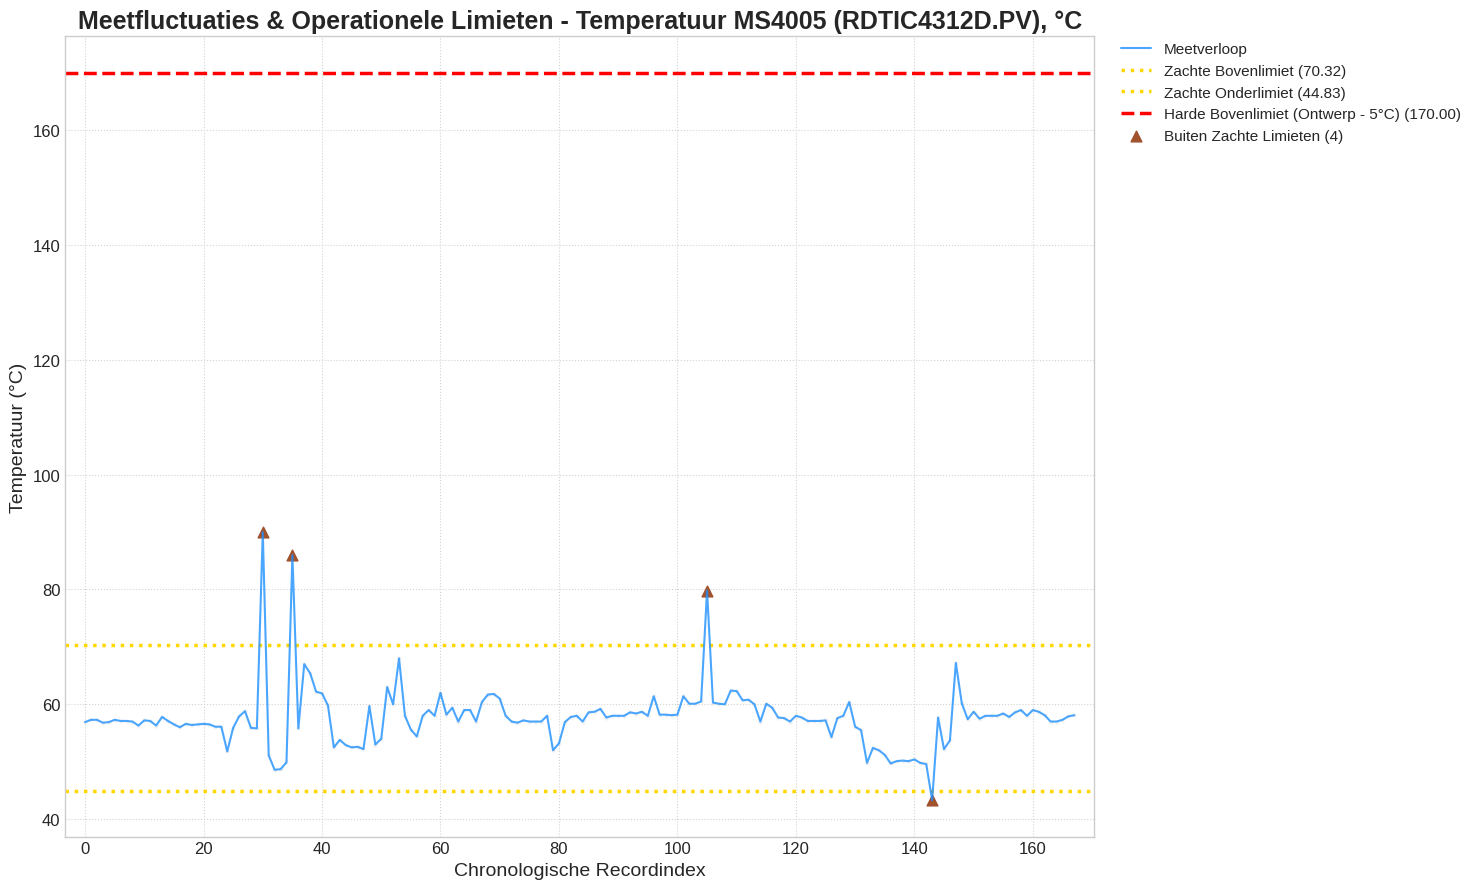


--- Analyse en grafiekgeneratie voor Temperatuur MS4005 (RDTIC4312D.PV), °C voltooid ---


--- Analyse van Metingen voor Druk MS410C (RCPI4434C), bar van: ./Feb_reactor C.csv ---
--- Apparaattype: druk, Ontwerp: 1.96, Bedrijf (proces): 0.5 ---
--- Gebruik van SOFT_LIMIT_IKA_MULTIPLIER: 4.5 ---

1. Data Opschonen en Voorbereiden:

3. Voorgestelde Operationele Limieten:
  Zachte Limieten: (0.23, 0.63)
  Harde Bovenlimiet: 1.76 (Ontwerp * 0.9)
Aantal zachte anomalieën gedetecteerd: 0

--- Genereren van Visuele Overzichtstabel als Afbeelding voor Druk MS410C (RCPI4434C), bar ---
  Visuele overzichtstabel opgeslagen naar: Druk_MS410C_RCPI4434C_bar_statistisch_overzicht_tabel.png

--- Genereren van Gerichte Fluctuatiegrafiek ---
  Gerichte fluctuatiegrafiek opgeslagen naar: Druk_MS410C_RCPI4434C_bar_gerichte_fluctuatie_grafiek.png


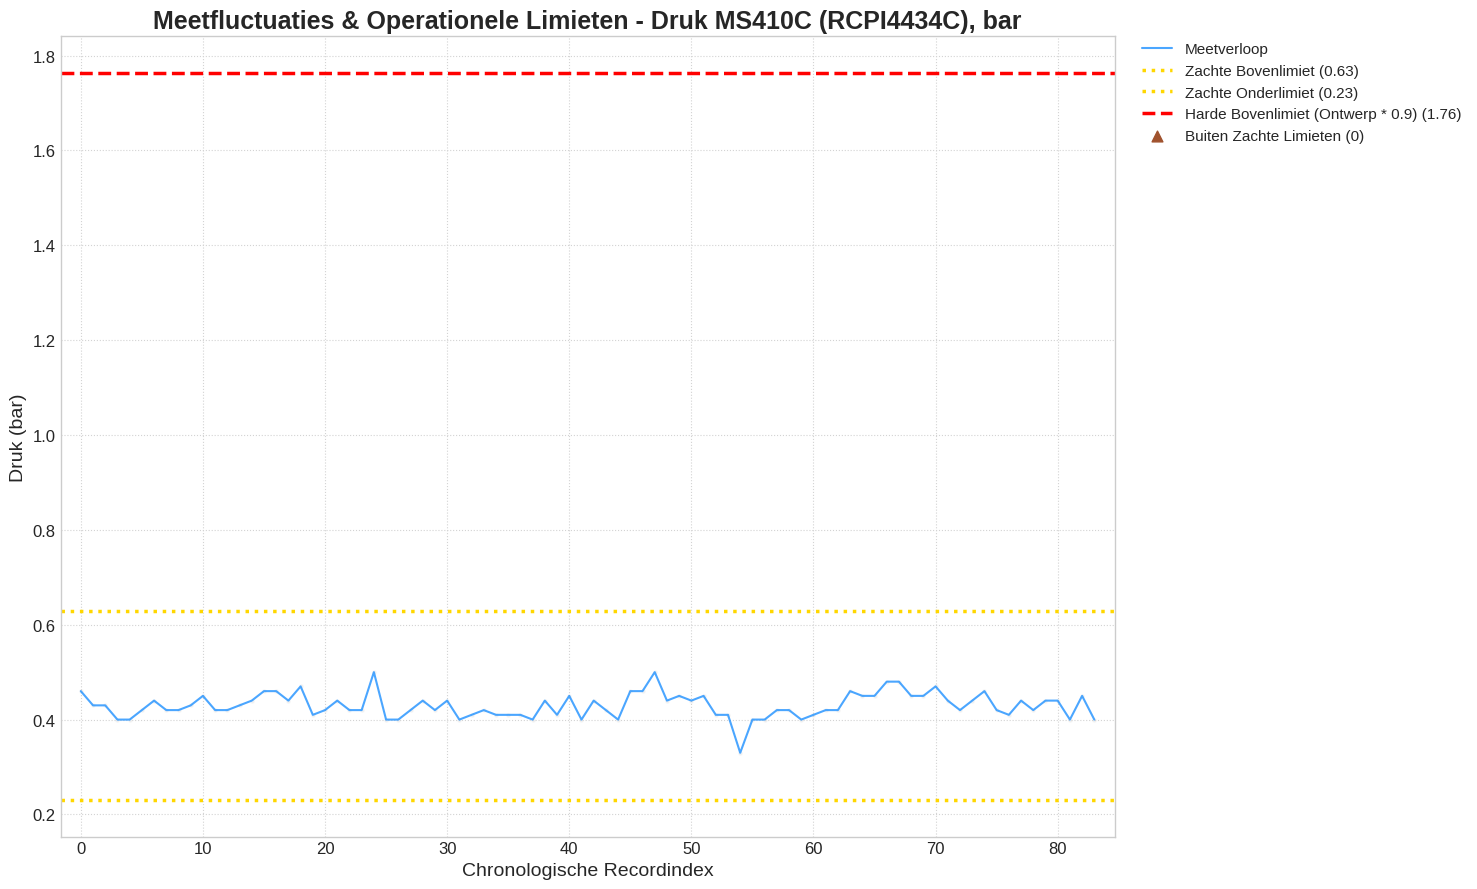


--- Analyse en grafiekgeneratie voor Druk MS410C (RCPI4434C), bar voltooid ---


--- Algemeen Statistisch Overzicht (Console) ---
Apparaatnaam                       Temperatuur MS4005 (RDTIC4312D.PV), °C  Druk MS410C (RCPI4434C), bar
Totaal Metingen                                                    168.00                         84.00
Min Waarde                                                          43.30                          0.33
Max Waarde                                                          90.00                          0.50
Gemiddelde                                                          57.64                          0.43
Mediaan                                                             57.65                          0.42
Standaardafwijking                                                   5.17                          0.03
Variantie                                                           26.71                          0.00
Bereik                               

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Keep seaborn if used elsewhere, though plt.style is direct
import os
from pandas.plotting import table

# --- BELANGRIJK: STEL UW HOOFDMAP HIER IN ---
HOOFD_MAP = "."

# --- GLOBAL CONSTANT FOR SOFT LIMITS ---
SOFT_LIMIT_IKA_MULTIPLIER = 4.5

# Definieer bestandspaden
BESTAND_D_NAAM = "reactor D.csv"
BESTAND_C_NAAM = "Feb_reactor C.csv"

BESTAND_D_PAD = os.path.join(HOOFD_MAP, BESTAND_D_NAAM)
BESTAND_C_PAD = os.path.join(HOOFD_MAP, BESTAND_C_NAAM)

def analyseer_apparaat_met_gerichte_uitvoer(bestands_pad, apparaat_naam_volledig, apparaat_type, ontwerp_waarde, bedrijfswaarde_proc):
    """
    Analyseert apparaatmetingen, stelt limieten voor, genereert grafiek en tabelafbeelding.
    """
    print(f"\n\n{'='*70}")
    print(f"--- Analyse van Metingen voor {apparaat_naam_volledig} van: {bestands_pad} ---")
    print(f"--- Apparaattype: {apparaat_type}, Ontwerp: {ontwerp_waarde}, Bedrijf (proces): {bedrijfswaarde_proc} ---")
    print(f"--- Gebruik van SOFT_LIMIT_IKA_MULTIPLIER: {SOFT_LIMIT_IKA_MULTIPLIER} ---")
    print(f"{'='*70}")

    try:
        gegevens_df = pd.read_csv(bestands_pad, header=None, names=['Dag', 'Tijd_Uur', 'Meting'])
    except FileNotFoundError:
        print(f"FOUT: Bestand niet gevonden op {bestands_pad}. Controleer pad en HOOFD_MAP.")
        return None
    except Exception as e:
        print(f"FOUT: Kon {bestands_pad} niet laden. Fout: {e}")
        return None

    print("\n1. Data Opschonen en Voorbereiden:")
    gegevens_df.dropna(how='all', inplace=True)
    try:
        for col in ['Dag', 'Tijd_Uur', 'Meting']:
            gegevens_df[col] = pd.to_numeric(gegevens_df[col], errors='coerce')
    except ValueError as e:
        print(f"FOUT: Kon kolommen niet converteren naar numeriek voor {apparaat_naam_volledig}. Fout: {e}")
        return None
    gegevens_df.dropna(subset=['Meting'], inplace=True)

    if gegevens_df.empty or gegevens_df['Meting'].isnull().all():
        print(f"Geen geldige meetdata om te analyseren voor {apparaat_naam_volledig} na opschonen.")
        return None

    gegevens_df.sort_values(by=['Dag', 'Tijd_Uur'], inplace=True)
    gegevens_df.reset_index(drop=True, inplace=True)

    metingen = gegevens_df['Meting']
    gem_waarde = metingen.mean()
    mediaan_waarde = metingen.median()
    std_afw = metingen.std()
    var_waarde = metingen.var()
    min_waarde = metingen.min()
    max_waarde = metingen.max()
    k1 = metingen.quantile(0.25)
    k3 = metingen.quantile(0.75)
    ika = k3 - k1
    data_bereik = max_waarde - min_waarde

    if ika == 0:
        print(f"WAARSCHUWING: Interkwartielafstand (IKA) is 0 voor {apparaat_naam_volledig}.")
        zachte_onderlimiet = k1 - (std_afw * 0.5 if std_afw > 0 else 0.1)
        zachte_bovenlimiet = k3 + (std_afw * 0.5 if std_afw > 0 else 0.1)
        print(f"Alternatieve zachte limieten ingesteld: ({zachte_onderlimiet:.2f}, {zachte_bovenlimiet:.2f})")
    else:
        zachte_onderlimiet = k1 - SOFT_LIMIT_IKA_MULTIPLIER * ika
        zachte_bovenlimiet = k3 + SOFT_LIMIT_IKA_MULTIPLIER * ika

    harde_bovenlimiet_label_suffix = ""
    if apparaat_type == "temperatuur":
        harde_bovenlimiet = ontwerp_waarde - 5
        harde_bovenlimiet_label_suffix = "(Ontwerp - 5°C)"
    elif apparaat_type == "druk":
        harde_bovenlimiet = ontwerp_waarde * 0.90
        harde_bovenlimiet_label_suffix = "(Ontwerp * 0.9)"
    else:
        harde_bovenlimiet = gem_waarde + 3 * std_afw
        harde_bovenlimiet_label_suffix = "(Gem + 3*StdAfw)"

    print("\n3. Voorgestelde Operationele Limieten:")
    print(f"  Zachte Limieten: ({zachte_onderlimiet:.2f}, {zachte_bovenlimiet:.2f})")
    print(f"  Harde Bovenlimiet: {harde_bovenlimiet:.2f} {harde_bovenlimiet_label_suffix}")

    gegevens_df['Is_Anomalie_Hard'] = (metingen > harde_bovenlimiet)
    anomalieen_hard_aantal = gegevens_df['Is_Anomalie_Hard'].sum()
    gegevens_df['Is_Anomalie_Zacht'] = (metingen < zachte_onderlimiet) | (metingen > zachte_bovenlimiet)
    anomalieen_zacht_aantal = gegevens_df['Is_Anomalie_Zacht'].sum()
    print(f"Aantal zachte anomalieën gedetecteerd: {anomalieen_zacht_aantal}")

    # ... (rest of your stats_overzicht_voor_return and table generation code remains the same) ...
    stats_overzicht_voor_return = {
        "Apparaatnaam": apparaat_naam_volledig, "Totaal Metingen": len(metingen), "Gemiddelde": gem_waarde,
        "Mediaan": mediaan_waarde, "Standaardafwijking": std_afw, "Variantie": var_waarde,
        "Min Waarde": min_waarde, "Max Waarde": max_waarde, "Bereik": data_bereik,
        "K1 (25e perc.)": k1, "K3 (75e perc.)": k3, "IKA": ika,
    }
    if apparaat_type == "temperatuur":
        stats_overzicht_voor_return["Temperatuur Ontwerp"] = ontwerp_waarde
        stats_overzicht_voor_return["Temperatuur Bedrijf (proces)"] = bedrijfswaarde_proc
    elif apparaat_type == "druk":
        stats_overzicht_voor_return["Druk Ontwerp"] = ontwerp_waarde
        stats_overzicht_voor_return["Druk Bedrijf (proces)"] = bedrijfswaarde_proc

    stats_overzicht_voor_return.update({
        f"Zachte Onderlimiet (K1-{SOFT_LIMIT_IKA_MULTIPLIER if ika !=0 else 'Alt.'}IKA)": zachte_onderlimiet,
        f"Zachte Bovenlimiet (K3+{SOFT_LIMIT_IKA_MULTIPLIER if ika !=0 else 'Alt.'}IKA)": zachte_bovenlimiet,
        f"Harde Bovenlimiet {harde_bovenlimiet_label_suffix}": harde_bovenlimiet,
        "Anomalieën (vs. Zacht)": anomalieen_zacht_aantal,
        "Anomalieën (vs. Hard)": anomalieen_hard_aantal
    })

    print(f"\n--- Genereren van Visuele Overzichtstabel als Afbeelding voor {apparaat_naam_volledig} ---")
    tabel_metrics = [
        "Totaal Metingen", "Gemiddelde", "Mediaan", "Std.Afw.", "Variantie",
        "Min Waarde", "Max Waarde", "Bereik", "K1 (25e perc.)",
        "K3 (75e perc.)", "IKA"
    ]
    tabel_waarden = [
        f"{len(metingen)}", f"{gem_waarde:.2f}", f"{mediaan_waarde:.2f}", f"{std_afw:.2f}", f"{var_waarde:.2f}",
        f"{min_waarde:.2f}", f"{max_waarde:.2f}", f"{data_bereik:.2f}", f"{k1:.2f}",
        f"{k3:.2f}", f"{ika:.2f}"
    ]
    if apparaat_type == "temperatuur":
        tabel_metrics.extend(["Temperatuur Ontwerp", "Temperatuur Bedrijf (proces)"])
        tabel_waarden.extend([f"{ontwerp_waarde:.2f} °C", f"{bedrijfswaarde_proc:.2f} °C"])
    elif apparaat_type == "druk":
        tabel_metrics.extend(["Druk Ontwerp", "Druk Bedrijf (proces)"])
        tabel_waarden.extend([f"{ontwerp_waarde:.2f} bar", f"{bedrijfswaarde_proc:.2f} bar"])

    tabel_metrics.extend([
        f"Zachte Onderlimiet (K1-{SOFT_LIMIT_IKA_MULTIPLIER if ika !=0 else 'Alt.'}IKA)",
        f"Zachte Bovenlimiet (K3+{SOFT_LIMIT_IKA_MULTIPLIER if ika !=0 else 'Alt.'}IKA)",
        f"Harde Bovenlimiet {harde_bovenlimiet_label_suffix}",
        "Anomalieën (vs. Zacht)", "Anomalieën (vs. Hard)"
    ])
    tabel_waarden.extend([
        f"{zachte_onderlimiet:.2f}", f"{zachte_bovenlimiet:.2f}",
        f"{harde_bovenlimiet:.2f}",
        f"{anomalieen_zacht_aantal}", f"{anomalieen_hard_aantal}"
    ])
    visuele_tabel_df = pd.DataFrame({"Metric": tabel_metrics, "Waarde": tabel_waarden})
    fig_tabel, ax_tabel = plt.subplots(figsize=(8, max(7, len(tabel_metrics) * 0.45)))
    ax_tabel.axis('tight'); ax_tabel.axis('off')
    de_tabel = table(ax_tabel, visuele_tabel_df, loc='center', colWidths=[0.6, 0.25])
    de_tabel.auto_set_font_size(False); de_tabel.set_fontsize(10); de_tabel.scale(1.0, 1.0)
    for key, cell in de_tabel.get_celld().items():
        cell.set_edgecolor('gray')
        if key[0] == 0: cell.set_text_props(weight='bold', color='white'); cell.set_facecolor('#2c3e50')
        elif key[1] == 0: cell.set_text_props(weight='bold'); cell.set_facecolor('#ecf0f1')
        else: cell.set_facecolor('white')
        cell.set_height(0.040)
    plt.title(f"Statistisch Overzicht: {apparaat_naam_volledig}", fontsize=14, weight='bold', pad=20)
    schoongemaakte_apparaatnaam_voor_bestand = apparaat_naam_volledig.replace(' ', '_').replace('(', '').replace(')', '').replace(',', '').replace('°C', 'C').replace('bar', 'bar')
    afbeelding_bestandsnaam_mpl = f"{schoongemaakte_apparaatnaam_voor_bestand}_statistisch_overzicht_tabel.png"
    try:
        plt.savefig(afbeelding_bestandsnaam_mpl, bbox_inches='tight', dpi=200)
        print(f"  Visuele overzichtstabel opgeslagen naar: {afbeelding_bestandsnaam_mpl}")
    except Exception as e: print(f"  Fout bij opslaan visuele overzichtstabel: {e}")
    plt.close(fig_tabel)


    print("\n--- Genereren van Gerichte Fluctuatiegrafiek ---")
    plt.style.use('seaborn-v0_8-whitegrid') # Good base style
    plt.figure(figsize=(18, 9)) # Consistent figure size

    # Raw data points (subtle background)
    plt.scatter(gegevens_df.index, gegevens_df['Meting'], color='lightgrey', alpha=0.2, s=5, zorder=0, label='_nolegend_')
    # Main measurement line
    plt.plot(gegevens_df.index, gegevens_df['Meting'], label='Meetverloop', color='dodgerblue', alpha=0.8, linewidth=1.5, zorder=3)

    # Soft limits
    plt.axhline(zachte_bovenlimiet, color='gold', linestyle=':', linewidth=2.5, label=f'Zachte Bovenlimiet ({zachte_bovenlimiet:.2f})', zorder=1)
    plt.axhline(zachte_onderlimiet, color='gold', linestyle=':', linewidth=2.5, label=f'Zachte Onderlimiet ({zachte_onderlimiet:.2f})', zorder=1)

    # Hard limit
    plot_hard_boven_label = f'Harde Bovenlimiet {harde_bovenlimiet_label_suffix} ({harde_bovenlimiet:.2f})'
    plt.axhline(harde_bovenlimiet, color='red', linestyle='--', linewidth=2.5, label=plot_hard_boven_label, zorder=1)

    # Soft anomalies - MODIFIED for consistent marker and legend entry
    anomalieen_zacht_df = gegevens_df[gegevens_df['Is_Anomalie_Zacht']]
    buiten_zachte_limieten_marker_color = 'sienna' # Brownish-orange like Graph 1
    buiten_zachte_limieten_marker_size = 60

    if not anomalieen_zacht_df.empty:
        plt.scatter(anomalieen_zacht_df.index, anomalieen_zacht_df['Meting'],
                    color=buiten_zachte_limieten_marker_color, marker='^', s=buiten_zachte_limieten_marker_size,
                    # removed edgecolor for filled look
                    label=f'Buiten Zachte Limieten ({anomalieen_zacht_aantal})', zorder=2) # zorder 2 or higher
    else:
        # Add an empty scatter for the legend entry if no points are outside
        plt.scatter([], [], color=buiten_zachte_limieten_marker_color, marker='^', s=buiten_zachte_limieten_marker_size,
                    label=f'Buiten Zachte Limieten ({anomalieen_zacht_aantal})')

    # Hard anomalies (style seems fine, ensure zorder is high)
    anomalieen_hard_df = gegevens_df[gegevens_df['Is_Anomalie_Hard']]
    if not anomalieen_hard_df.empty:
        plt.scatter(anomalieen_hard_df.index, anomalieen_hard_df['Meting'],
                    color='maroon', marker='o', s=60, edgecolor='black', linewidth=1,
                    label=f'Boven Harde Bovenlimiet ({anomalieen_hard_aantal})', zorder=4) # zorder 4 to be on top

    plt.title(f'Meetfluctuaties & Operationele Limieten - {apparaat_naam_volledig}', fontsize=18, weight='bold')
    plt.xlabel('Chronologische Recordindex', fontsize=14)
    y_label_grafiek = "Meetwaarde" # Default
    if "°C" in apparaat_naam_volledig: y_label_grafiek = "Temperatuur (°C)"
    elif "bar" in apparaat_naam_volledig: y_label_grafiek = "Druk (bar)"
    plt.ylabel(y_label_grafiek, fontsize=14)
    plt.xticks(fontsize=12); plt.yticks(fontsize=12)

    # --- START: X-axis and Y-axis limit adjustments for consistency ---
    # X-axis limits (add small padding like Graph 1)
    idx_min_x = gegevens_df.index.min()
    idx_max_x = gegevens_df.index.max()
    x_range_plot = idx_max_x - idx_min_x
    if x_range_plot == 0: # single data point
        x_padding_plot = 0.5
    else:
        x_padding_plot = x_range_plot * 0.02 # 2% padding
    plt.xlim(idx_min_x - x_padding_plot, idx_max_x + x_padding_plot)

    # Y-axis limits to match Graph 1's behavior (snug fit with padding)
    all_relevant_y_values_for_plot = [
        metingen.min(), metingen.max(),
        zachte_onderlimiet, zachte_bovenlimiet
    ]
    if pd.notna(harde_bovenlimiet): # Include hard limit if it's a valid number
        all_relevant_y_values_for_plot.append(harde_bovenlimiet)
    # Remove any potential NaNs that might have slipped in
    all_relevant_y_values_for_plot = [y for y in all_relevant_y_values_for_plot if pd.notna(y) and np.isfinite(y)]

    if all_relevant_y_values_for_plot: # Check if list is not empty
        min_y_for_axis = min(all_relevant_y_values_for_plot)
        max_y_for_axis = max(all_relevant_y_values_for_plot)

        y_range_plot = max_y_for_axis - min_y_for_axis
        if y_range_plot == 0: # If all points are the same (e.g., flat line)
            y_padding_plot = 0.1 * abs(max_y_for_axis) if max_y_for_axis != 0 else 0.1 # 10% of value or 0.1
        else:
            y_padding_plot = y_range_plot * 0.05 # 5% padding, as Graph 1 looks fairly snug

        final_ylim_bottom = min_y_for_axis - y_padding_plot
        final_ylim_top = max_y_for_axis + y_padding_plot

        # Refinement: prevent y-axis going too far negative if data is all positive and near zero
        if min_y_for_axis >= 0 and final_ylim_bottom < 0:
            # If padding pulls it "too far" negative relative to data scale, clamp or reduce negative extent
            if abs(final_ylim_bottom) > 0.5 * min_y_for_axis and min_y_for_axis > 0.001: # min_y_for_axis is not effectively zero
                 final_ylim_bottom = -0.05 * y_range_plot # Allow a small negative dip
            elif min_y_for_axis < 0.001 : # Effectively zero or very close to it
                 final_ylim_bottom = -y_padding_plot # Just the padding amount below zero

        plt.ylim(final_ylim_bottom, final_ylim_top)
    # --- END: X-axis and Y-axis limit adjustments ---

    handles, labels = plt.gca().get_legend_handles_labels()
    if len(handles) > 0:
        # Consistent legend placement logic
        if len(handles) > 3 or len(apparaat_naam_volledig) > 35 : # Adjusted thresholds slightly for more consistent outside legend
            plt.legend(handles=handles, labels=labels, fontsize=11, loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0.)
            plt.tight_layout(rect=[0, 0, 0.83, 1]) # Make space for the legend (your 0.83 is fine)
        else:
            plt.legend(handles=handles, labels=labels, fontsize=11, loc='best')
            plt.tight_layout()
    else:
        plt.tight_layout()

    # Grid customization to match Graph 1 - MODIFIED
    plt.grid(True, which='major', linestyle=':', linewidth=0.8, color='lightgray') # Dotted, light gray

    grafiek_bestandsnaam = f"{schoongemaakte_apparaatnaam_voor_bestand}_gerichte_fluctuatie_grafiek.png"
    try:
        plt.savefig(grafiek_bestandsnaam, dpi=200)
        print(f"  Gerichte fluctuatiegrafiek opgeslagen naar: {grafiek_bestandsnaam}")
    except Exception as e: print(f"  Fout bij opslaan gerichte fluctuatiegrafiek: {e}")

    plt.show() # Show plot
    print(f"\n--- Analyse en grafiekgeneratie voor {apparaat_naam_volledig} voltooid ---")
    return stats_overzicht_voor_return

# --- Hoofduitvoering ---
if __name__ == "__main__":
    # Create dummy CSV files if they don't exist for testing
    if not os.path.exists(BESTAND_D_PAD):
        print(f"Info: Dummy {BESTAND_D_NAAM} wordt aangemaakt voor testdoeleinden.")
        # Simulate data similar to Graph 1 (Temperature)
        np.random.seed(0)
        days_d = np.repeat(np.arange(1, 18), 10)
        hours_d = np.tile(np.arange(0, 20, 2), 17) # 10 readings per day for 17 days
        measurements_d = 55 + 10 * np.sin(np.arange(len(days_d)) / 20) + np.random.normal(0, 5, len(days_d))
        # Add some spikes for anomalies
        measurements_d[25] = 90
        measurements_d[30] = 85
        measurements_d[45] = 10 # low spike
        measurements_d[105] = 80
        pd.DataFrame({'Dag': days_d, 'Tijd_Uur': hours_d, 'Meting': measurements_d}).to_csv(BESTAND_D_PAD, header=False, index=False)

    if not os.path.exists(BESTAND_C_PAD):
        print(f"Info: Dummy {BESTAND_C_NAAM} wordt aangemaakt voor testdoeleinden.")
        # Simulate data similar to Graph 2 (Pressure)
        np.random.seed(42)
        num_points_c = 90
        days_c = np.repeat(np.arange(1, 10), 10) # 10 readings per day for 9 days
        hours_c = np.tile(np.arange(0,20,2),9)
        base_druk = 0.4
        noise_druk = np.random.normal(0, 0.04, num_points_c)
        fluctuations_druk = 0.05 * np.sin(np.arange(num_points_c) / 5) + 0.03 * np.cos(np.arange(num_points_c) / 15)
        measurements_c = base_druk + noise_druk + fluctuations_druk
        measurements_c = np.clip(measurements_c, 0.25, 0.55)
        pd.DataFrame({'Dag': days_c, 'Tijd_Uur': hours_c, 'Meting': measurements_c}).to_csv(BESTAND_C_PAD, header=False, index=False)


    alle_apparaat_stats = []

    if not os.path.exists(BESTAND_D_PAD):
        print(f"FOUT: {BESTAND_D_NAAM} niet gevonden op {BESTAND_D_PAD}.")
    else:
        TEMP_APPARAAT_NAAM = "Temperatuur MS4005 (RDTIC4312D.PV), °C"
        TEMP_ONTWERP = 175.0
        TEMP_BEDRIJFSWAARDE_PROCES = 55.0
        stats_d = analyseer_apparaat_met_gerichte_uitvoer(BESTAND_D_PAD, TEMP_APPARAAT_NAAM, "temperatuur", TEMP_ONTWERP, TEMP_BEDRIJFSWAARDE_PROCES)
        if stats_d: alle_apparaat_stats.append(stats_d)

    if not os.path.exists(BESTAND_C_PAD):
         print(f"FOUT: {BESTAND_C_NAAM} niet gevonden op {BESTAND_C_PAD}.")
    else:
        DRUK_APPARAAT_NAAM = "Druk MS410C (RCPI4434C), bar"
        DRUK_ONTWERP = 1.96 # This makes hard limit 1.764
        DRUK_BEDRIJFSWAARDE_PROCES = 0.5
        stats_c = analyseer_apparaat_met_gerichte_uitvoer(BESTAND_C_PAD, DRUK_APPARAAT_NAAM, "druk", DRUK_ONTWERP, DRUK_BEDRIJFSWAARDE_PROCES)
        if stats_c: alle_apparaat_stats.append(stats_c)

    # ... (rest of your main execution code for summary_df remains the same) ...
    if alle_apparaat_stats:
        samenvatting_df = pd.DataFrame(alle_apparaat_stats)
        if "Apparaatnaam" in samenvatting_df.columns:
            samenvatting_df = samenvatting_df.set_index("Apparaatnaam")

        basis_kolom_volgorde = [
            "Totaal Metingen", "Min Waarde", "Max Waarde", "Gemiddelde", "Mediaan",
            "Standaardafwijking", "Variantie", "Bereik", "K1 (25e perc.)", "K3 (75e perc.)", "IKA"
        ]
        ontwerp_bedrijf_kolommen = ["Temperatuur Ontwerp", "Temperatuur Bedrijf (proces)", "Druk Ontwerp", "Druk Bedrijf (proces)"]
        anomalie_kolommen = ["Anomalieën (vs. Zacht)", "Anomalieën (vs. Hard)"]

        bestelde_kolommen = []
        alle_huidige_kolommen = list(samenvatting_df.columns)

        for kol_groep in [basis_kolom_volgorde, ontwerp_bedrijf_kolommen]:
            for kol in kol_groep:
                if kol in alle_huidige_kolommen:
                    bestelde_kolommen.append(kol)
                    alle_huidige_kolommen.remove(kol)

        zachte_limiet_onder_kolom_standaard = f"Zachte Onderlimiet (K1-{SOFT_LIMIT_IKA_MULTIPLIER}IKA)"
        zachte_limiet_onder_kolom_alt = "Zachte Onderlimiet (K1-Alt.IKA)"
        zachte_limiet_boven_kolom_standaard = f"Zachte Bovenlimiet (K3+{SOFT_LIMIT_IKA_MULTIPLIER}IKA)"
        zachte_limiet_boven_kolom_alt = "Zachte Bovenlimiet (K3+Alt.IKA)"

        if zachte_limiet_onder_kolom_standaard in alle_huidige_kolommen:
            bestelde_kolommen.append(zachte_limiet_onder_kolom_standaard)
            alle_huidige_kolommen.remove(zachte_limiet_onder_kolom_standaard)
        elif zachte_limiet_onder_kolom_alt in alle_huidige_kolommen:
             bestelde_kolommen.append(zachte_limiet_onder_kolom_alt)
             alle_huidige_kolommen.remove(zachte_limiet_onder_kolom_alt)


        if zachte_limiet_boven_kolom_standaard in alle_huidige_kolommen:
            bestelde_kolommen.append(zachte_limiet_boven_kolom_standaard)
            alle_huidige_kolommen.remove(zachte_limiet_boven_kolom_standaard)
        elif zachte_limiet_boven_kolom_alt in alle_huidige_kolommen:
            bestelde_kolommen.append(zachte_limiet_boven_kolom_alt)
            alle_huidige_kolommen.remove(zachte_limiet_boven_kolom_alt)

        harde_limiet_kolommen_gevonden = [kol for kol in alle_huidige_kolommen if "Harde Bovenlimiet" in kol]
        harde_limiet_kolommen_gevonden.sort()
        for kol in harde_limiet_kolommen_gevonden:
            bestelde_kolommen.append(kol)
            if kol in alle_huidige_kolommen: alle_huidige_kolommen.remove(kol)

        for kol_groep in [anomalie_kolommen, alle_huidige_kolommen]:
             for kol in kol_groep:
                if kol in samenvatting_df.columns and kol not in bestelde_kolommen :
                    bestelde_kolommen.append(kol)

        final_ordered_columns = [col for col in bestelde_kolommen if col in samenvatting_df.columns]
        for col in samenvatting_df.columns:
            if col not in final_ordered_columns:
                final_ordered_columns.append(col)

        samenvatting_df_besteld = samenvatting_df[final_ordered_columns]

        print("\n\n" + "="*80 + "\n--- Algemeen Statistisch Overzicht (Console) ---\n" + "="*80)
        if len(alle_apparaat_stats) <= 4 : print(samenvatting_df_besteld.T.to_string(float_format="%.2f"))
        else: print(samenvatting_df_besteld.to_string(float_format="%.2f"))
    else:
        print("\nGeen data verwerkt om een overzicht te genereren.")

    print("\n\nAlle analyses voltooid.")